# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

import plotly.offline as offline
offline.init_notebook_mode()
from collections import Counter
import chart_studio.plotly as py
import plotly.graph_objs as go

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv',nrows=70000)
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (70000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
'''price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')'''

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## preprocessing of project_grade_category

In [8]:
project_grade_category = list(project_data['project_grade_category'].values)

project_grade_category_list = []

for grade in project_grade_category:
    grade = grade.lower()
    grade_replace = grade.replace(' ', '_')
    grade_final_replace = grade_replace.replace('-', '_')
    
    project_grade_category_list.append(grade_final_replace)
    
# Now replace the "school_state" column by the cleaned one.
project_data['clean_project_grade_category'] = project_grade_category_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)

In [9]:
clean_project_grade_category = list(project_data['clean_project_grade_category'].values)
print(list(set(clean_project_grade_category)))

['grades_6_8', 'grades_3_5', 'grades_prek_2', 'grades_9_12']


## preprocessing of teacher_prefix

In [10]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].apply(lambda x: np.str_(x))

In [11]:
teacher_prefix = list(project_data['teacher_prefix'].values)

teacher_prefix_list = []

for prefix in teacher_prefix:
    prefix = prefix.replace('.','')
    teacher_prefix_list.append(prefix.lower())

# Now replace the "teacher_prefix" column by the cleaned one.
project_data['clean_teacher_prefix'] = teacher_prefix_list
project_data.drop(['teacher_prefix'], axis=1, inplace=True)

In [12]:
clean_teacher_prefix = list(project_data['clean_teacher_prefix'].values)
print(list(set(clean_teacher_prefix)))

['nan', 'ms', 'mr', 'mrs', 'dr', 'teacher']


## 1.3 Text preprocessing

In [13]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [14]:
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

  clean_project_grade_category clean_teacher_prefix  \
0                grades_prek_2                  mrs   
1                   grades_6_8                   mr   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [15]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [16]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [17]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [18]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [19]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [20]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [21]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [22]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.lower().split() if e not in stopwords)#sent.lower() convert the text to lower case
    preprocessed_essays.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [01:11<00:00, 973.96it/s]


In [23]:
# after preprocesing
preprocessed_essays[20000]

'kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism eager beavers always strive work hardest working past limitations materials ones seek students teach title school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore ever felt like ants pants needed groove move meeting kids feel time want able move learn say wobble chairs answer love develop core enhances gross motor turn fine motor skills also want learn games kids not want sit worksheets want learn count jumping playing physical engagement key success number toss color shape mats make happen students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [24]:
# similarly you can preprocess the titles also
# similarly you can preprocess the titles also
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[20000])
print("="*50)
print(project_data['project_title'].values[29999])
print("="*50)

Educational Support for English Learners at Home
More Movement with Hokki Stools
Sailing Into a Super 4th Grade Year
We Need To Move It While We Input It!
Bodies in Motion Learn!


In [25]:
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554
    sent = ' '.join(e for e in sent.lower().split() if e not in stopwords)#sent.lower() convert the text to lower case
    preprocessed_project_title.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 70000/70000 [00:03<00:00, 18823.72it/s]


In [26]:
# after preprocesing
print(preprocessed_project_title[0])
print("="*50)
print(preprocessed_project_title[50])
print("="*50)
print(preprocessed_project_title[10000])
print("="*50)

educational support english learners home
active energized
family book clubs


## 1.5 Preparing data for models

In [27]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'clean_project_grade_category', 'clean_teacher_prefix', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

## Train/Test Split and Cross Validation

In [28]:
#https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# create training and testing vars
X=project_data
Y=project_data['project_is_approved']
project_data.drop(['project_is_approved'], axis = 1, inplace = True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, stratify = Y )
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size=0.30, stratify=Y_train)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)
print(X_cv.shape, Y_cv.shape)

(34300, 19) (34300,)
(21000, 19) (21000,)
(14700, 19) (14700,)


In [29]:
feature_names = list()

## project_subject_categories

In [30]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer1.fit(X_train['clean_categories'].values)
X_train_categories_one_hot = vectorizer1.fit_transform(X_train['clean_categories'].values)
X_test_categories_one_hot = vectorizer1.transform(X_test['clean_categories'].values)
X_cv_categories_one_hot = vectorizer1.transform(X_cv['clean_categories'].values)
print("After vectorizations")
print(X_train_categories_one_hot.shape, Y_train.shape)
print(X_cv_categories_one_hot.shape, Y_cv.shape)
print(X_test_categories_one_hot.shape, Y_test.shape)
print(vectorizer1.get_feature_names())


After vectorizations
(34300, 9) (34300,)
(14700, 9) (14700,)
(21000, 9) (21000,)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


In [31]:
f1=vectorizer1.get_feature_names()
print("After vectorizations")
print(X_train_categories_one_hot.shape, Y_train.shape)
print(X_cv_categories_one_hot.shape, Y_cv.shape)
print(X_test_categories_one_hot.shape, Y_test.shape)
print("="*100)


After vectorizations
(34300, 9) (34300,)
(14700, 9) (14700,)
(21000, 9) (21000,)


## Project_subject_subcategories

In [32]:
# we use count vectorizer to convert the values into one 
vectorizer2 = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer2.fit(X_train['clean_subcategories'].values)

X_train_sub_categories_one_hot = vectorizer2.fit_transform(X_train['clean_subcategories'].values)
X_test_sub_categories_one_hot = vectorizer2.transform(X_test['clean_subcategories'].values)
X_cv_sub_categories_one_hot = vectorizer2.transform(X_cv['clean_subcategories'].values)
print("After vectorizations")
print(X_train_sub_categories_one_hot.shape, Y_train.shape)
print(X_cv_sub_categories_one_hot.shape, Y_cv.shape)
print(X_test_sub_categories_one_hot.shape, Y_test.shape)
print(vectorizer2.get_feature_names())

After vectorizations
(34300, 30) (34300,)
(14700, 30) (14700,)
(21000, 30) (21000,)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'History_Geography', 'Music', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


## STATE


In [33]:
my_counter = Counter()
for states in project_data['school_state'].values:
    my_counter.update(states.split())   
    
school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))
from sklearn.feature_extraction.text import CountVectorizer
vectorizer3 = CountVectorizer(vocabulary=list(sorted_school_state_dict.keys()), lowercase=False, binary=True)
vectorizer3.fit(X_train['school_state'].values)
X_train_school_state_categories_one_hot = vectorizer3.fit_transform(X_train['school_state'].values)
X_test_school_state_categories_one_hot = vectorizer3.transform(X_test['school_state'].values)
X_cv_school_state_categories_one_hot = vectorizer3.transform(X_cv['school_state'].values)
print("After vectorizations")
print(X_train_school_state_categories_one_hot.shape, Y_train.shape)
print(X_cv_school_state_categories_one_hot.shape, Y_cv.shape)
print(X_test_school_state_categories_one_hot.shape, Y_test.shape)
print(vectorizer3.get_feature_names())

After vectorizations
(34300, 51) (34300,)
(14700, 51) (14700,)
(21000, 51) (21000,)
['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NH', 'DE', 'NE', 'AK', 'WV', 'HI', 'ME', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'TN', 'CT', 'AL', 'UT', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'LA', 'MA', 'OH', 'IN', 'MO', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']


## TEACHER_PREFIX

In [34]:
mylist = ['nan', 'teacher', 'mrs', 'mr', 'ms', 'dr']
mylist = list( dict.fromkeys(mylist) )
print(mylist)

['nan', 'teacher', 'mrs', 'mr', 'ms', 'dr']


In [37]:
import numpy as np
vectorizer4 = CountVectorizer(vocabulary=clean_teacher_prefixes)
X_train['clean_teacher_prefix'] = X_train['clean_teacher_prefix'].fillna('null') #to fill the empty or not defined value with nan
clean_teacher_prefixes = list(X_train['clean_teacher_prefix'].unique())
clean_teacher_prefixes.remove('nan')
vectorizer4.fit(X_train['clean_teacher_prefix'].values.astype(str))
X_train_clean_teacher_prefix = vectorizer4.fit_transform(X_train['clean_teacher_prefix'].values)
X_test_clean_teacher_prefix = vectorizer4.transform(X_test['clean_teacher_prefix'].values.astype(str))
X_cv_clean_teacher_prefix = vectorizer4.transform(X_cv['clean_teacher_prefix'].values.astype(str))
print("After vectorizations")
print(X_train_clean_teacher_prefix.shape, Y_train.shape)
print(X_cv_clean_teacher_prefix.shape, Y_cv.shape)
print(X_test_clean_teacher_prefix.shape, Y_test.shape)
print(vectorizer4.get_feature_names())

After vectorizations
(34300, 5) (34300,)
(14700, 5) (14700,)
(21000, 5) (21000,)
['mr', 'ms', 'mrs', 'teacher', 'dr']


## project_grade_category

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer5 = CountVectorizer(vocabulary=list(project_data['clean_project_grade_category'].unique()), lowercase=False, binary=True)
vectorizer5.fit(X_train['clean_project_grade_category'].values.astype(str))
X_train_grade = vectorizer5.fit_transform(X_train['clean_project_grade_category'].values)
X_test_grade = vectorizer5.transform(X_test['clean_project_grade_category'].values.astype(str))
X_cv_grade = vectorizer5.transform(X_cv['clean_project_grade_category'].values.astype(str))
print("After vectorizations")
print(X_train_grade.shape, Y_train.shape)
print(X_cv_grade.shape, Y_cv.shape)
print(X_test_grade.shape, Y_test.shape)
print(vectorizer5.get_feature_names())


After vectorizations
(34300, 4) (34300,)
(14700, 4) (14700,)
(21000, 4) (21000,)
['grades_prek_2', 'grades_6_8', 'grades_3_5', 'grades_9_12']


## Numerical Feature: PRICE

In [43]:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')

In [44]:
X_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price_x', 'quantity_x',
       'clean_categories', 'clean_subcategories',
       'clean_project_grade_category', 'clean_teacher_prefix', 'essay',
       'price_y', 'quantity_y', 'price', 'quantity'],
      dtype='object')

In [45]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))
X_train_price = normalizer.fit_transform(X_train['price'].values.reshape(1,-1).transpose())
X_cv_price = normalizer.transform(X_cv['price'].values.reshape(1,-1).transpose())
X_test_price = normalizer.transform(X_test['price'].values.reshape(1,-1).transpose())
print("After vectorizations")
print(X_train_price.shape, Y_train.shape)
print(X_cv_price.shape, Y_cv.shape)
print(X_test_price.shape, Y_test.shape)
feature_names.append('price')

After vectorizations
(34300, 1) (34300,)
(14700, 1) (14700,)
(21000, 1) (21000,)


## teacher_number_of_previously_posted_projects

In [46]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).transpose())
X_train_prev_project_norm =normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).transpose())
X_cv_prev_project_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).transpose())
X_test_prev_project_norm =normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1).transpose())
print("After vectorizations")
print(X_train_prev_project_norm.shape, Y_train.shape)
print(X_cv_prev_project_norm.shape, Y_cv.shape)
print(X_test_prev_project_norm.shape, Y_test.shape)


After vectorizations
(34300, 1) (34300,)
(14700, 1) (14700,)
(21000, 1) (21000,)


### 1.5.2 Vectorizing Text data

### 1.5.2.1 Bag of words(ESSAY)

In [47]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer6 = CountVectorizer(min_df=10)
vectorizer6.fit(X_train['essay'].values) 

X_train_essay_bow = vectorizer6.fit_transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer6.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer6.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, Y_train.shape)
print(X_cv_essay_bow.shape, Y_cv.shape)
print(X_test_essay_bow.shape, Y_test.shape)

After vectorizations
(34300, 10949) (34300,)
(14700, 10949) (14700,)
(21000, 10949) (21000,)


## BOW(Title)

In [100]:
vectorizer7 = CountVectorizer(min_df=10)
vectorizer7.fit(X_train['project_title'].values) 

X_train_project_title_bow = vectorizer7.fit_transform(X_train['project_title'].values)
X_cv_project_title_bow = vectorizer7.transform(X_cv['project_title'].values)
X_test_project_title_bow = vectorizer7.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_project_title_bow.shape, Y_train.shape)
print(X_cv_project_title_bow.shape, Y_cv.shape)
print(X_test_project_title_bow.shape, Y_test.shape)

After vectorizations
(34300, 1648) (34300,)
(14700, 1648) (14700,)
(21000, 1648) (21000,)


### 1.5.2.2 TFIDF vectorizer(ESSAY)

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer8 = TfidfVectorizer(min_df=10)
X_train_essay_tfidf = vectorizer8.fit_transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer8.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer8.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, Y_train.shape)
print(X_cv_essay_tfidf.shape, Y_cv.shape)
print(X_test_essay_tfidf.shape, Y_test.shape)

After vectorizations
(34300, 10949) (34300,)
(14700, 10949) (14700,)
(21000, 10949) (21000,)


## TFIDF vectorizer(Title)

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer9 = TfidfVectorizer(min_df=10)
vectorizer9.fit(X_train['project_title'].values) 

X_train_project_title_tfidf = vectorizer9.fit_transform(X_train['project_title'].values)
X_cv_project_title_tfidf = vectorizer9.transform(X_cv['project_title'].values)
X_test_project_title_tfidf = vectorizer9.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_project_title_tfidf.shape, Y_train.shape)
print(X_cv_project_title_tfidf.shape, Y_cv.shape)
print(X_test_project_title_tfidf.shape, Y_test.shape)

After vectorizations
(34300, 1679) (34300,)
(14700, 1679) (14700,)
(21000, 1679) (21000,)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [48]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
'''def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')


Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!


words = []
for i in preprocessed_essays:
    words.extend(i.split(' '))

for i in preprocessed_project_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)
'''

'def loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n\nwords = []\nfor i in preprocessed_essays:\n    words.extend(i.split(\' \'))\n\nfor i in preprocessed_project_title:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(words)\nprint("The number of words that are present in both glove vectors and our coupus",       len(inter_words),"(",np.round(len(inte

In [49]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [50]:
# average Word2Vec
# compute average word2vec for each review.
X_tr_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_tr_essay_avg_w2v.append(vector)

print(len(X_tr_essay_avg_w2v))
print(len(X_tr_essay_avg_w2v[0]))

100%|██████████████████████████████████████████████████████████████████████████| 34300/34300 [00:27<00:00, 1256.45it/s]

34300
300


In [51]:
X_te_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_te_essay_avg_w2v.append(vector)

print(len(X_te_essay_avg_w2v))
print(len(X_te_essay_avg_w2v[0]))

100%|██████████████████████████████████████████████████████████████████████████| 21000/21000 [00:14<00:00, 1461.87it/s]

21000
300


In [52]:
X_cv_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_essay_avg_w2v.append(vector)

print(len(X_cv_essay_avg_w2v))
print(len(X_cv_essay_avg_w2v[0]))

100%|██████████████████████████████████████████████████████████████████████████| 14700/14700 [00:10<00:00, 1424.60it/s]

14700
300


## Avg W2V(Title)

In [53]:
X_tr_title_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_tr_title_avg_w2v.append(vector)

print(len(X_tr_title_avg_w2v))
print(len(X_tr_title_avg_w2v[0]))

100%|█████████████████████████████████████████████████████████████████████████| 34300/34300 [00:00<00:00, 63206.50it/s]

34300
300


In [54]:
X_te_title_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_te_title_avg_w2v.append(vector)

print(len(X_te_title_avg_w2v))
print(len(X_te_title_avg_w2v[0]))

100%|█████████████████████████████████████████████████████████████████████████| 21000/21000 [00:00<00:00, 64259.79it/s]

21000
300


In [55]:
X_cv_title_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_title_avg_w2v.append(vector)

print(len(X_cv_title_avg_w2v))
print(len(X_cv_title_avg_w2v[0]))

100%|█████████████████████████████████████████████████████████████████████████| 14700/14700 [00:00<00:00, 50201.57it/s]

14700
300


## 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V(ESSAY)

In [56]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [57]:
# average Word2Vec
# compute average word2vec for each review.
X_tr_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_tr_tfidf_w2v_vectors.append(vector)

print(len(X_tr_tfidf_w2v_vectors))
print(len(X_tr_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 34300/34300 [04:08<00:00, 138.18it/s]

34300
300


In [58]:
# average Word2Vec
# compute average word2vec for each review.
X_cv_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_tfidf_w2v_vectors.append(vector)

print(len(X_cv_tfidf_w2v_vectors))
print(len(X_cv_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 14700/14700 [01:49<00:00, 134.12it/s]

14700
300


In [59]:
X_te_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_te_tfidf_w2v_vectors.append(vector)

print(len(X_te_tfidf_w2v_vectors))
print(len(X_te_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 21000/21000 [02:22<00:00, 146.88it/s]

21000
300


## Similarly you can vectorize for title also
## Title(TFIDF-AVG W2V)

In [60]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [61]:
X_train_project_title_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_train['project_title']: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
# here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v 
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_project_title_tfidf_w2v.append(vector)
print(len(X_train_project_title_tfidf_w2v))
print(len(X_train_project_title_tfidf_w2v[0]))

34300
300


In [62]:
X_cv_project_title_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_cv['project_title']: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
# here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v 
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_project_title_tfidf_w2v.append(vector)
print(len(X_cv_project_title_tfidf_w2v))
print(len(X_cv_project_title_tfidf_w2v[0]))

14700
300


In [63]:
X_test_project_title_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_test['project_title']: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
# here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v 
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_project_title_tfidf_w2v.append(vector)
print(len(X_test_project_title_tfidf_w2v))
print(len(X_test_project_title_tfidf_w2v[0]))

21000
300


# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

## 2.4.1 Applying Decision Tree on BOW

In [60]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

In [61]:
from scipy.sparse import hstack
X_tr = hstack((X_train_school_state_categories_one_hot,X_train_sub_categories_one_hot,X_train_categories_one_hot,X_train_clean_teacher_prefix,X_train_grade,
X_train_price,X_train_prev_project_norm,X_train_essay_bow,X_train_project_title_bow)).tocsr()

X_cr = hstack((X_cv_school_state_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_categories_one_hot,X_cv_clean_teacher_prefix,X_cv_grade,
X_cv_price,X_cv_prev_project_norm,X_cv_essay_bow,X_cv_project_title_bow)).tocsr()

X_te = hstack((X_test_school_state_categories_one_hot,X_test_sub_categories_one_hot,X_test_categories_one_hot,X_test_clean_teacher_prefix,X_test_grade,
X_test_price,X_test_prev_project_norm,X_test_essay_bow,X_test_project_title_bow)).tocsr()

print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_cr.shape, Y_cv.shape)
print(X_te.shape, Y_test.shape)


Final Data matrix
(34300, 12631) (34300,)
(14700, 12631) (14700,)
(21000, 12631) (21000,)


In [62]:
X_tr = X_tr.toarray()
X_cr = X_cr.toarray()
X_te = X_te.toarray()

## Simple Cross Validation:

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

depth = [1, 5, 10, 50, 100, 500, 1000]
train_auc = list()
cv_auc = list()
for d in depth:
    for sample in [5, 10, 100, 500]:
        dtc = DecisionTreeClassifier(max_depth = d, class_weight='balanced', min_samples_split = sample)
        dtc.fit(X_tr, Y_train)
        
        Y_probs_tr = dtc.predict(X_tr)
        Y_probs_cv = dtc.predict(X_cr)

        train_auc.append(roc_auc_score(Y_train, Y_probs_tr))
        cv_auc.append(roc_auc_score(Y_cv, Y_probs_cv))


In [64]:
train_auc = np.asarray(train_auc).reshape(7,4)
cv_auc = np.asarray(cv_auc).reshape(7,4)

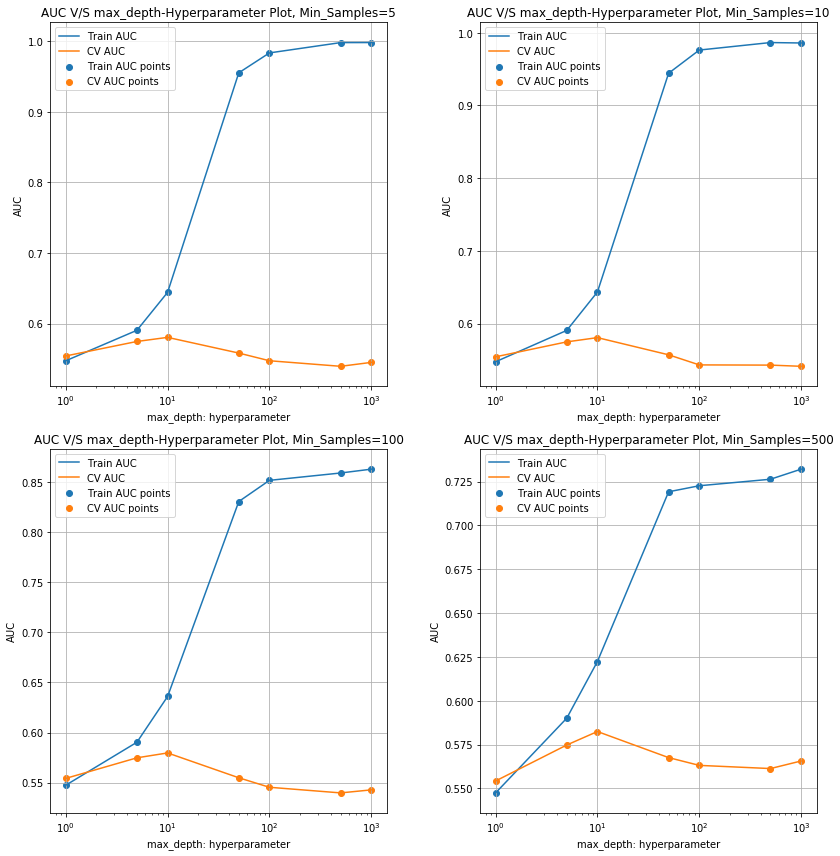

In [65]:
sample_list = [5, 10, 100, 500]
fig = plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(depth, train_auc[:,i], label='Train AUC')
    plt.plot(depth, cv_auc[:,i], label='CV AUC')
    plt.scatter(depth, train_auc[:,i], label='Train AUC points')
    plt.scatter(depth, cv_auc[:,i], label='CV AUC points')

    plt.xscale('log')
    plt.legend()
    plt.xlabel("max_depth: hyperparameter")
    plt.ylabel("AUC")
    plt.title("AUC V/S max_depth-Hyperparameter Plot, Min_Samples=" + str(sample_list[i]))
    plt.grid()
fig.tight_layout()
plt.show()

In [108]:
print(clf.best_estimator_)
#Mean cross-validated score of the best_estimator
print(clf.score(X_tr,Y_train))
print(clf.score(X_te,Y_test))

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.6758325619719893
0.6077790266347262


In [109]:
clf.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__presort', 'estimator__random_state', 'estimator__splitter', 'estimator', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

## Grid Search CV

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}
clf = GridSearchCV(dtc, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

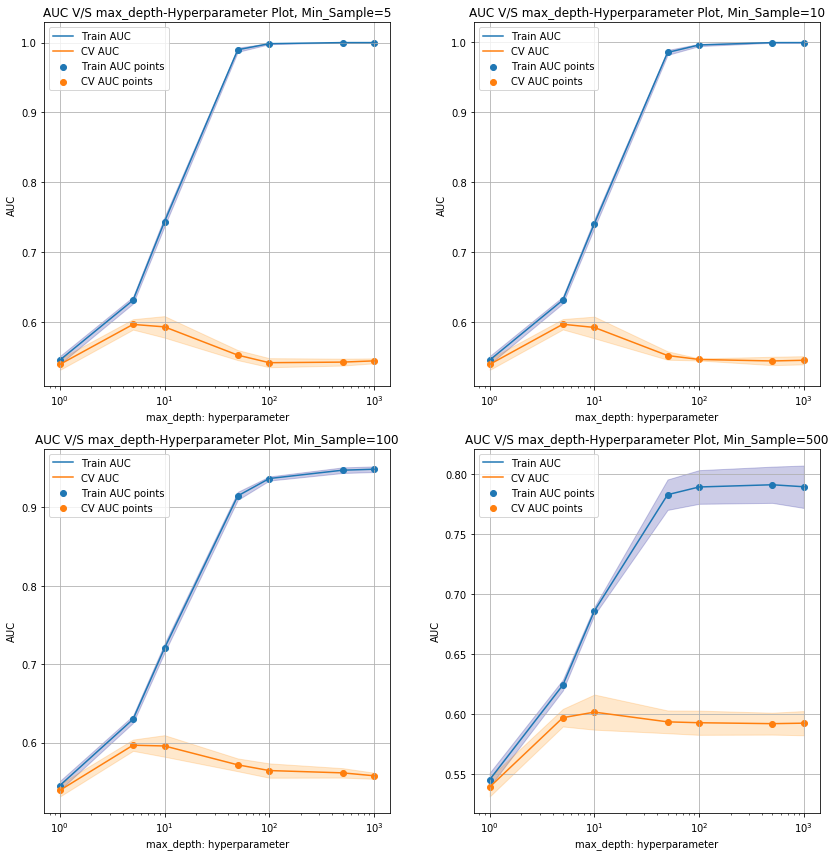

In [67]:
sample_list = [5, 10, 100, 500]
fig = plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(parameters['max_depth'], train_auc.reshape(7,4)[:,i], label='Train AUC')
    # https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(parameters['max_depth'],train_auc.reshape(7,4)[:,i] - train_auc_std.reshape(7,4)[:,i],train_auc.reshape(7,4)[:,i] + train_auc_std.reshape(7,4)[:,i],alpha=0.2,color='darkblue')

    plt.plot(parameters['max_depth'], cv_auc.reshape(7,4)[:,i], label='CV AUC')
    plt.gca().fill_between(parameters['max_depth'],cv_auc.reshape(7,4)[:,i] - cv_auc_std.reshape(7,4)[:,i],cv_auc.reshape(7,4)[:,i] + cv_auc_std.reshape(7,4)[:,i],alpha=0.2,color='darkorange')

    plt.scatter(parameters['max_depth'], train_auc.reshape(7,4)[:,i], label='Train AUC points')
    plt.scatter(parameters['max_depth'], cv_auc.reshape(7,4)[:,i], label='CV AUC points')

    plt.xscale('log')
    plt.legend()
    plt.xlabel("max_depth: hyperparameter")
    plt.ylabel("AUC")
    plt.title("AUC V/S max_depth-Hyperparameter Plot, Min_Sample=" + str(sample_list[i]))
    plt.grid()
fig.tight_layout()
plt.show()

## Training with best hyperparameter value:

Train AUC: 0.676
Test AUC: 0.608


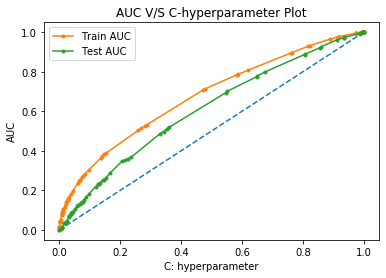

In [68]:
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

model_M = DecisionTreeClassifier(max_depth=10, min_samples_split=500, class_weight='balanced')
model_M.fit(X_tr, Y_train)
Y_probs_train = model_M.predict_proba(X_tr)
Y_probs_test = model_M.predict_proba(X_te)
Y_predicted = model_M.predict(X_te)
Y_predicted_tr = model_M.predict(X_tr)

# keep probabilities for the positive outcome only
Y_probs_train = Y_probs_train[:, 1]
Y_probs_test = Y_probs_test[:, 1]
# calculate AUC
train_auc = roc_auc_score(Y_train, Y_probs_train)
test_auc = roc_auc_score(Y_test, Y_probs_test)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, Y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, Y_probs_test)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
pyplot.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
pyplot.legend()
pyplot.xlabel("C: hyperparameter")
pyplot.ylabel("AUC")
pyplot.title("AUC V/S C-hyperparameter Plot")
# show the plot
pyplot.show()

## Confusion Matrix(Train and Test)

In [69]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1 # make it global
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.38 for threshold 0.49
the maximum value of tpr*(1-fpr) 0.33 for threshold 0.49


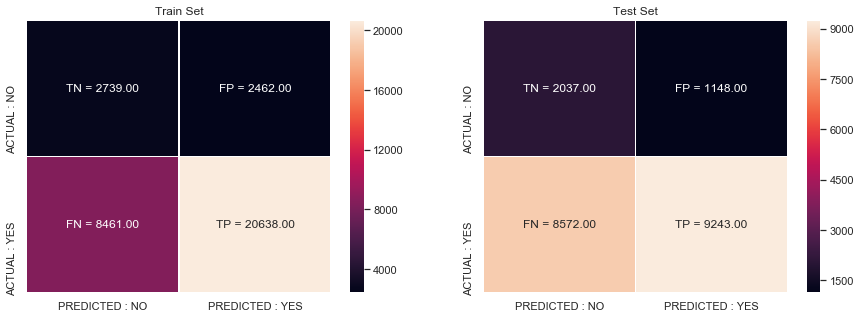

In [70]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()
con_m_train = confusion_matrix(Y_train, predict(Y_probs_train, train_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(Y_test, predict(Y_probs_test, test_thresholds, test_fpr, test_tpr))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

### 2.4.1.1  Graphviz visualization of Decision Tree on BOW<font color='red'> SET 1</font>

In [117]:
# Saving the graphiz into local
import graphviz
from sklearn import tree
from graphviz import Source
import os

os.environ["PATH"] += os.pathsep + 'C:\Users\shubh\Downloads\graphviz-2.38\release\bin'
data = Source(tree.export_graphviz(model_M, out_file=None, feature_names=feature_names_bow, max_depth=3 ))

png = data.pipe(format='png')
with open('bow_dtree.png','wb') as f:
    f.write(png)

In [115]:
Y_te = list(Y_test)
Y_pr = list(Y_predicted)
print(len(Y_te), len(Y_pr))
fp_essay = list()
fp_price = list()
fp_prev_proj = list()
for i in range(len(Y_te)):
    if Y_te[i] == 0 and Y_pr[i] == 1:
        fp_essay.append(X_test.essay.values[i])
        fp_price.append(X_test.price.values[i])
        fp_prev_proj.append(X_test.teacher_number_of_previously_posted_projects.values[i])
print(len(fp_essay), len(fp_prev_proj), len(fp_price))

21000 21000
1091 1091 1091


### WORDCLOUD

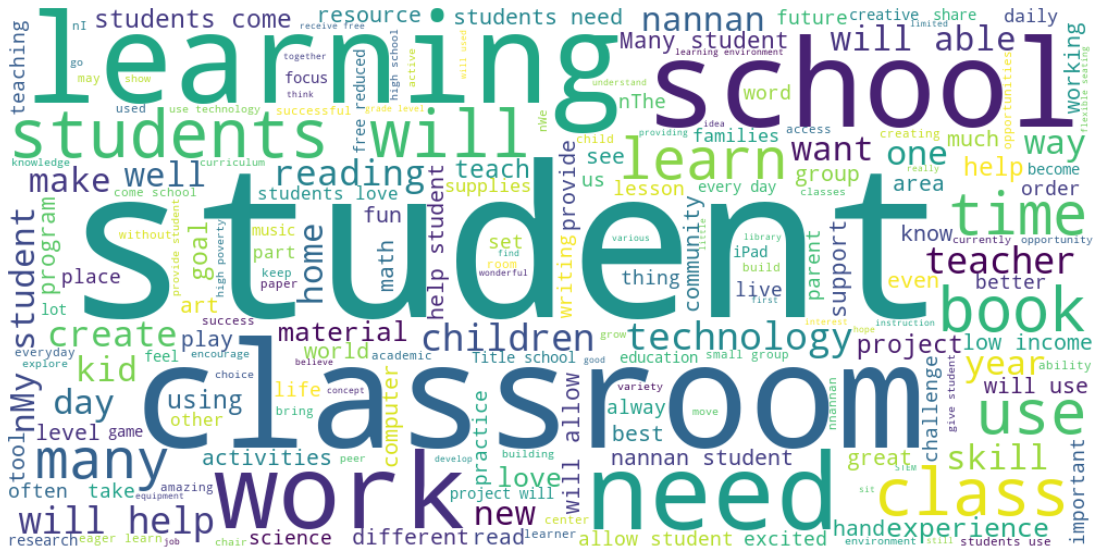

In [118]:
text = " ".join(review for review in fp_essay)
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(text)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 2.4.1.2 False Positive Price Box Plot<font color='red'> SET 1</font>

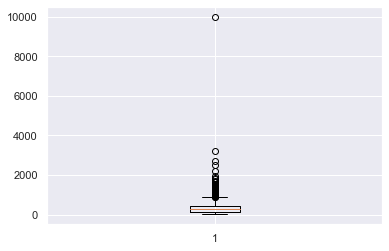

In [119]:
plt.boxplot(fp_price)
plt.show()

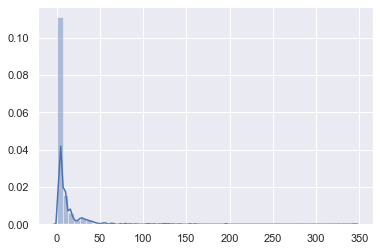

In [120]:
import seaborn as sns
sns.set()
sns.distplot(fp_prev_proj)

## 2.4.1 Applying Decision Tree on TFIDF

In [122]:
from scipy.sparse import hstack
X_tr = hstack((X_train_school_state_categories_one_hot,X_train_sub_categories_one_hot,X_train_categories_one_hot,X_train_clean_teacher_prefix,X_train_grade,
X_train_price,X_train_prev_project_norm,X_train_essay_tfidf,X_train_project_title_tfidf)).tocsr()

X_cr = hstack((X_cv_school_state_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_categories_one_hot,X_cv_clean_teacher_prefix,X_cv_grade,
X_cv_price,X_cv_prev_project_norm,X_cv_essay_tfidf,X_cv_project_title_tfidf)).tocsr()

X_te = hstack((X_test_school_state_categories_one_hot,X_test_sub_categories_one_hot,X_test_categories_one_hot,X_test_clean_teacher_prefix,X_test_grade,
X_test_price,X_test_prev_project_norm,X_test_essay_tfidf,X_test_project_title_tfidf)).tocsr()

print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_cr.shape, Y_cv.shape)
print(X_te.shape, Y_test.shape)

Final Data matrix
(34300, 12631) (34300,)
(14700, 12631) (14700,)
(21000, 12631) (21000,)


In [123]:
X_tr = X_tr.toarray()
X_cr = X_cr.toarray()
X_te = X_te.toarray()

## Simple Cross Validation:

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

depth = [1, 5, 10, 50, 100, 500, 1000]
train_auc = list()
cv_auc = list()
for d in depth:
    for sample in [5, 10, 100, 500]:
        dtc = DecisionTreeClassifier(max_depth = d, class_weight='balanced', min_samples_split = sample)
        dtc.fit(X_tr, Y_train)
        
        Y_probs_tr = dtc.predict(X_tr)
        Y_probs_cv = dtc.predict(X_cr)

        train_auc.append(roc_auc_score(Y_train, Y_probs_tr))
        cv_auc.append(roc_auc_score(Y_cv, Y_probs_cv))


In [126]:
train_auc = np.asarray(train_auc).reshape(7,4)
cv_auc = np.asarray(cv_auc).reshape(7,4)

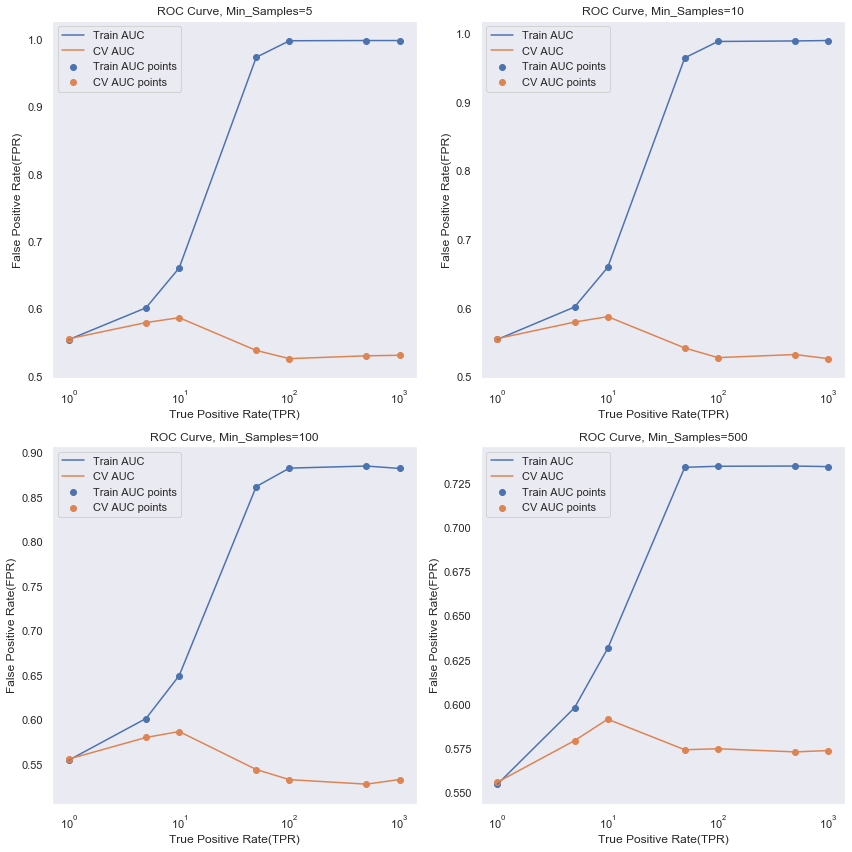

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}
clf = GridSearchCV(dtc, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

## Grid Search CV

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}
clf = GridSearchCV(dtc, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

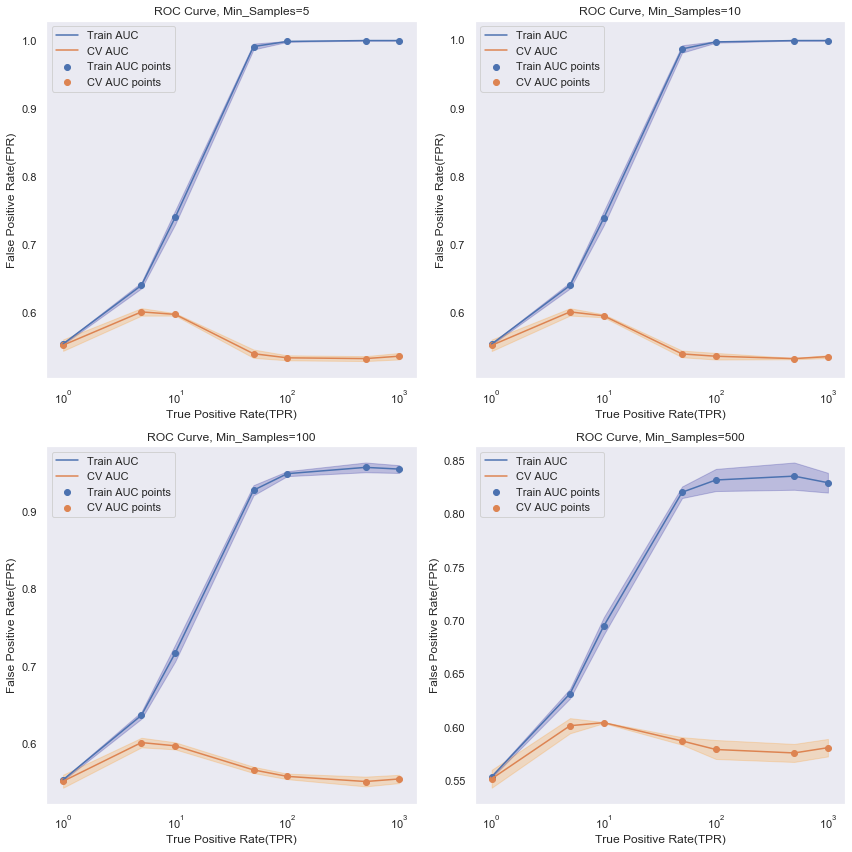

In [130]:
fig = plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(parameters['max_depth'], train_auc.reshape(7,4)[:,i], label='Train AUC')
    # https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(parameters['max_depth'],train_auc.reshape(7,4)[:,i] - train_auc_std.reshape(7,4)[:,i],train_auc.reshape(7,4)[:,i] + train_auc_std.reshape(7,4)[:,i],alpha=0.2,color='darkblue')

    plt.plot(parameters['max_depth'], cv_auc.reshape(7,4)[:,i], label='CV AUC')
    plt.gca().fill_between(parameters['max_depth'],cv_auc.reshape(7,4)[:,i] - cv_auc_std.reshape(7,4)[:,i],cv_auc.reshape(7,4)[:,i] + cv_auc_std.reshape(7,4)[:,i],alpha=0.2,color='darkorange')

    plt.scatter(parameters['max_depth'], train_auc.reshape(7,4)[:,i], label='Train AUC points')
    plt.scatter(parameters['max_depth'], cv_auc.reshape(7,4)[:,i], label='CV AUC points')

    plt.xscale('log')
    plt.legend()
    plt.xlabel("True Positive Rate(TPR)")
    plt.ylabel("False Positive Rate(FPR)")
    plt.title("ROC Curve, Min_Samples=" + str(sample_list[i]))
    plt.grid()
fig.tight_layout()
plt.show()

Train AUC: 0.682
Test AUC: 0.615


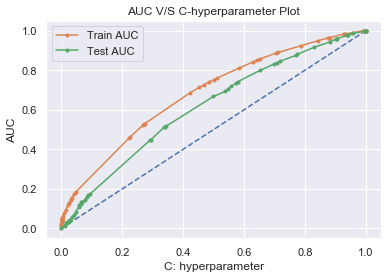

In [131]:
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

model_M = DecisionTreeClassifier(max_depth=10, min_samples_split=500, class_weight='balanced')
model_M.fit(X_tr, Y_train)
Y_probs_train = model_M.predict_proba(X_tr)
Y_probs_test = model_M.predict_proba(X_te)
Y_predicted = model_M.predict(X_te)
Y_predicted_tr = model_M.predict(X_tr)

# keep probabilities for the positive outcome only
Y_probs_train = Y_probs_train[:, 1]
Y_probs_test = Y_probs_test[:, 1]
# calculate AUC
train_auc = roc_auc_score(Y_train, Y_probs_train)
test_auc = roc_auc_score(Y_test, Y_probs_test)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, Y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, Y_probs_test)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
pyplot.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
pyplot.legend()
pyplot.xlabel("C: hyperparameter")
pyplot.ylabel("AUC")
pyplot.title("AUC V/S C-hyperparameter Plot")
# show the plot
pyplot.show()

## Confusion Matrix(Train and Test)

In [132]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1 # make it global
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.4 for threshold 0.51
the maximum value of tpr*(1-fpr) 0.34 for threshold 0.52


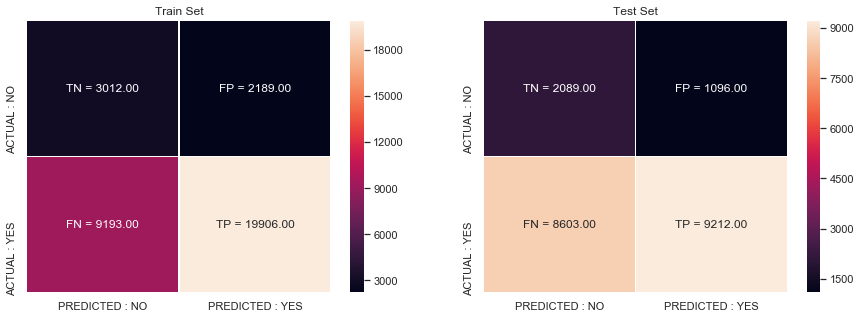

In [133]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()
con_m_train = confusion_matrix(Y_train, predict(Y_probs_train, train_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(Y_test, predict(Y_probs_test, test_thresholds, test_fpr, test_tpr))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

### 2.4.1.1  Graphviz visualization of Decision Tree on TFIDF

In [124]:
# Saving the graphiz tree in local
import graphviz
from sklearn import tree
from graphviz import Source

data = Source(tree.export_graphviz(model_M, out_file=None, feature_names=feature_names, max_depth=3 ))

png = data.pipe(format='png')
with open('tfidf_dtree.png','wb') as f:
    f.write(png)

#### 2.4.2.1 Top 10 important features of positive class from<font color='red'> SET 2</font>

In [134]:
Y_te = list(Y_test)
Y_pr = list(Y_predicted)
print(len(Y_te), len(Y_pr))
fp_essay = list()
fp_price = list()
fp_prev_proj = list()
for i in range(len(Y_te)):
    if Y_te[i] == 0 and Y_pr[i] == 1:
        fp_essay.append(X_test.essay.values[i])
        fp_price.append(X_test.price.values[i])
        fp_prev_proj.append(X_test.teacher_number_of_previously_posted_projects.values[i])
print(len(fp_essay), len(fp_prev_proj), len(fp_price))

21000 21000
1590 1590 1590


### False Positive Essay WordCloud

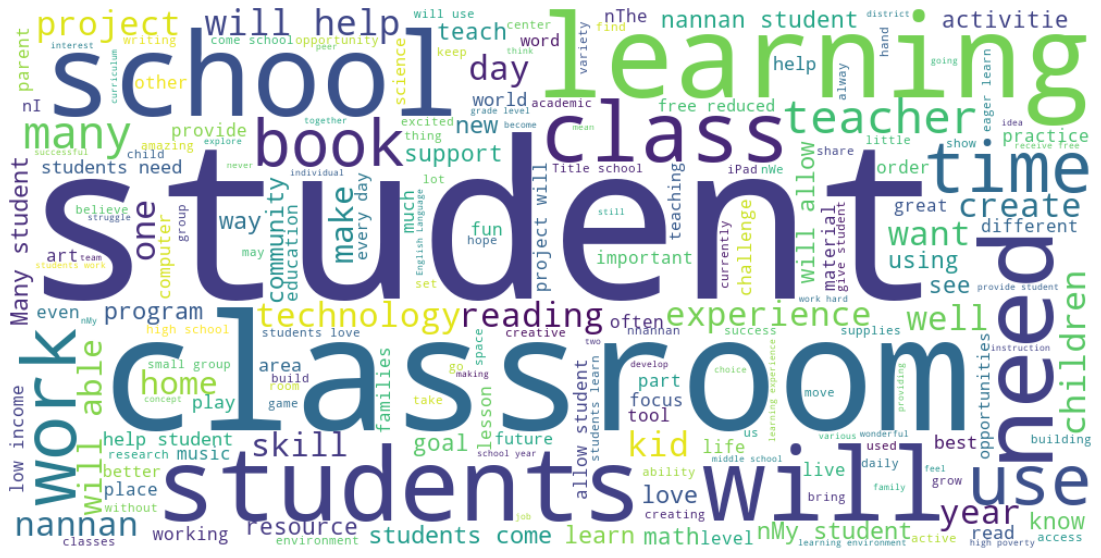

In [135]:
text = " ".join(review for review in fp_essay)
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(text)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### False Positive Price Box Plot

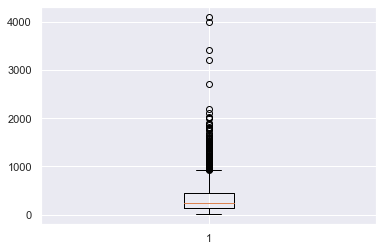

In [136]:
plt.boxplot(fp_price)
plt.show()

### False Positive Previous Projects PDF

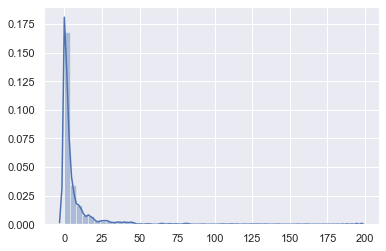

In [137]:
import seaborn as sns
sns.set()
sns.distplot(fp_prev_proj)

## 2.4.1 Applying Decision Tree on AVG w2v

In [65]:
from scipy.sparse import hstack
X_tr = hstack((X_train_school_state_categories_one_hot,X_train_sub_categories_one_hot,X_train_categories_one_hot,X_train_clean_teacher_prefix,X_train_grade,X_train_price,X_train_prev_project_norm,X_tr_essay_avg_w2v,X_tr_title_avg_w2v))

X_cr = hstack((X_cv_school_state_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_categories_one_hot,X_cv_clean_teacher_prefix,X_cv_grade,X_cv_price,X_cv_prev_project_norm,X_cv_essay_avg_w2v,X_cv_title_avg_w2v))

X_te = hstack((X_test_school_state_categories_one_hot,X_test_sub_categories_one_hot,X_test_categories_one_hot,X_test_clean_teacher_prefix,X_test_grade,X_test_price,X_test_prev_project_norm,X_te_essay_avg_w2v,X_te_title_avg_w2v))

print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_cr.shape, Y_cv.shape)
print(X_te.shape, Y_test.shape)

Final Data matrix
(34300, 701) (34300,)
(14700, 701) (14700,)
(21000, 701) (21000,)


## Simple Cross Validation:

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

depth = [1, 5, 10, 50, 100, 500, 1000]
train_auc = list()
cv_auc = list()
for d in depth:
    for sample in [5, 10, 100, 500]:
        dtc = DecisionTreeClassifier(max_depth = d, class_weight='balanced', min_samples_split = sample)
        dtc.fit(X_tr, Y_train)
        
        Y_probs_tr = dtc.predict(X_tr)
        Y_probs_cv = dtc.predict(X_cr)

        train_auc.append(roc_auc_score(Y_train, Y_probs_tr))
        cv_auc.append(roc_auc_score(Y_cv, Y_probs_cv))


In [67]:
train_auc = np.asarray(train_auc).reshape(7,4)
cv_auc = np.asarray(cv_auc).reshape(7,4)

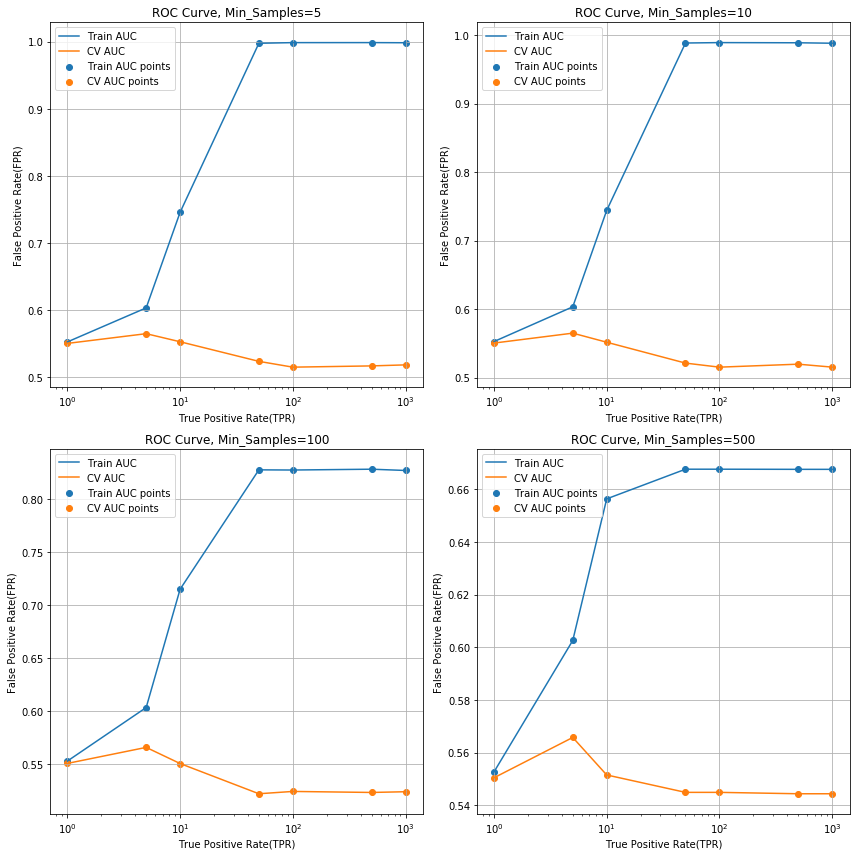

In [68]:
sample_list = [5, 10, 100, 500]
fig = plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(depth, train_auc[:,i], label='Train AUC')
    plt.plot(depth, cv_auc[:,i], label='CV AUC')
    plt.scatter(depth, train_auc[:,i], label='Train AUC points')
    plt.scatter(depth, cv_auc[:,i], label='CV AUC points')

    plt.xscale('log')
    plt.legend()
    plt.xlabel("True Positive Rate(TPR)")
    plt.ylabel("False Positive Rate(FPR)")
    plt.title("ROC Curve, Min_Samples=" + str(sample_list[i]))
    plt.grid()
fig.tight_layout()
plt.show()

## GRid Search CV

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}
clf = GridSearchCV(dtc, parameters, cv=3, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(X_tr, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


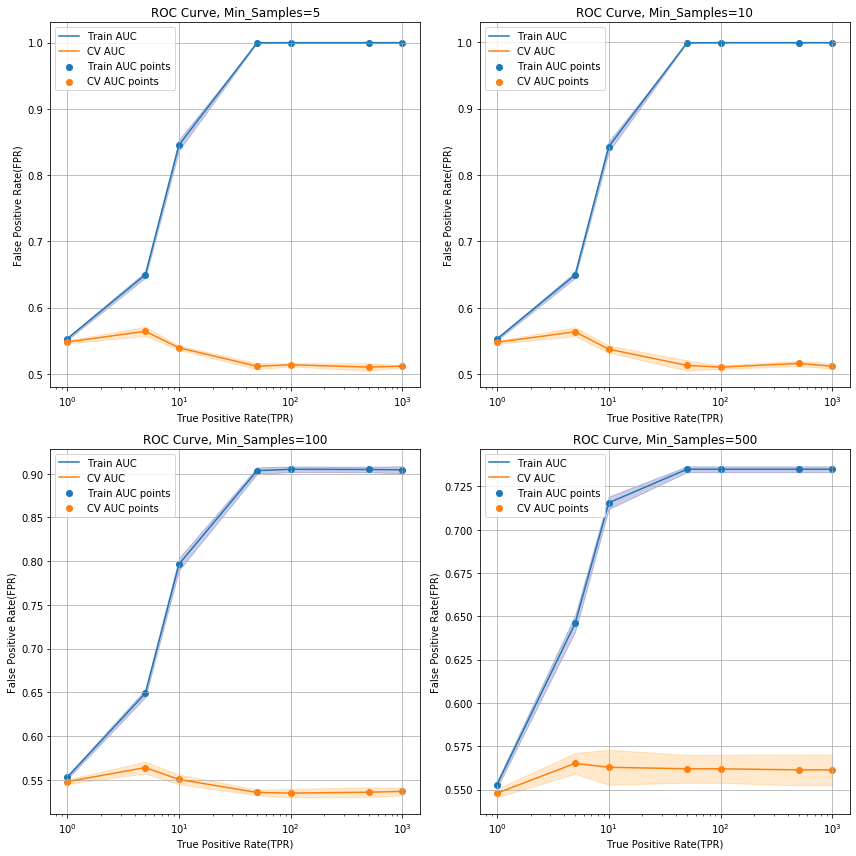

In [70]:
fig = plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(parameters['max_depth'], train_auc.reshape(7,4)[:,i], label='Train AUC')
    # https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(parameters['max_depth'],train_auc.reshape(7,4)[:,i] - train_auc_std.reshape(7,4)[:,i],train_auc.reshape(7,4)[:,i] + train_auc_std.reshape(7,4)[:,i],alpha=0.2,color='darkblue')

    plt.plot(parameters['max_depth'], cv_auc.reshape(7,4)[:,i], label='CV AUC')
    plt.gca().fill_between(parameters['max_depth'],cv_auc.reshape(7,4)[:,i] - cv_auc_std.reshape(7,4)[:,i],cv_auc.reshape(7,4)[:,i] + cv_auc_std.reshape(7,4)[:,i],alpha=0.2,color='darkorange')

    plt.scatter(parameters['max_depth'], train_auc.reshape(7,4)[:,i], label='Train AUC points')
    plt.scatter(parameters['max_depth'], cv_auc.reshape(7,4)[:,i], label='CV AUC points')

    plt.xscale('log')
    plt.legend()
    plt.xlabel("True Positive Rate(TPR)")
    plt.ylabel("False Positive Rate(FPR)")
    plt.title("ROC Curve, Min_Samples=" + str(sample_list[i]))
    plt.grid()
fig.tight_layout()
plt.show()

Train AUC: 0.640
Test AUC: 0.583


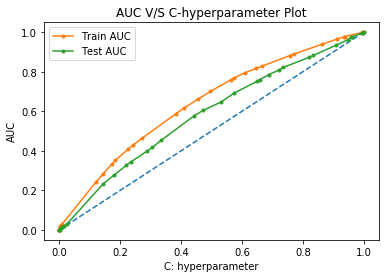

In [71]:
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

model_M = DecisionTreeClassifier(max_depth=5, min_samples_split=5, class_weight='balanced')
model_M.fit(X_tr, Y_train)
Y_probs_train = model_M.predict_proba(X_tr)
Y_probs_test = model_M.predict_proba(X_te)
Y_predicted = model_M.predict(X_te)
Y_predicted_tr = model_M.predict(X_tr)

# keep probabilities for the positive outcome only
Y_probs_train = Y_probs_train[:, 1]
Y_probs_test = Y_probs_test[:, 1]
# calculate AUC
train_auc = roc_auc_score(Y_train, Y_probs_train)
test_auc = roc_auc_score(Y_test, Y_probs_test)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, Y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, Y_probs_test)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
pyplot.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
pyplot.legend()
pyplot.xlabel("C: hyperparameter")
pyplot.ylabel("AUC")
pyplot.title("AUC V/S C-hyperparameter Plot")
# show the plot
pyplot.show()

In [75]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1 # make it global
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.36 for threshold 0.53
the maximum value of tpr*(1-fpr) 0.32 for threshold 0.5


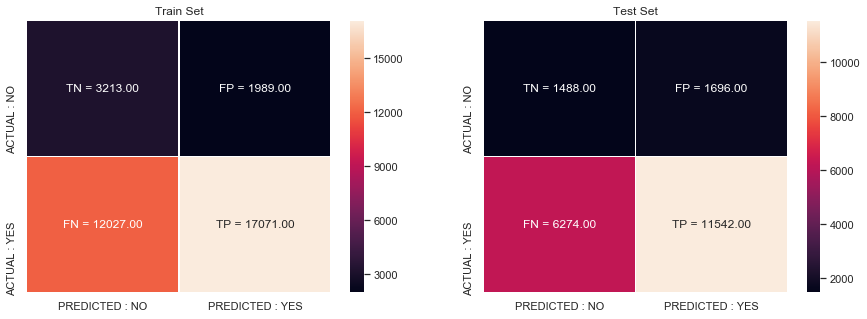

In [76]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()
con_m_train = confusion_matrix(Y_train, predict(Y_probs_train, train_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(Y_test, predict(Y_probs_test, test_thresholds, test_fpr, test_tpr))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [77]:
Y_te = list(Y_test)
Y_pr = list(Y_predicted)
print(len(Y_te), len(Y_pr))
fp_essay = list()
fp_price = list()
fp_prev_proj = list()
for i in range(len(Y_te)):
    if Y_te[i] == 0 and Y_pr[i] == 1:
        fp_essay.append(X_test.essay.values[i])
        fp_price.append(X_test.price.values[i])
        fp_prev_proj.append(X_test.teacher_number_of_previously_posted_projects.values[i])
print(len(fp_essay), len(fp_prev_proj), len(fp_price))

21000 21000
1506 1506 1506


### False Positive Essay WordCloud

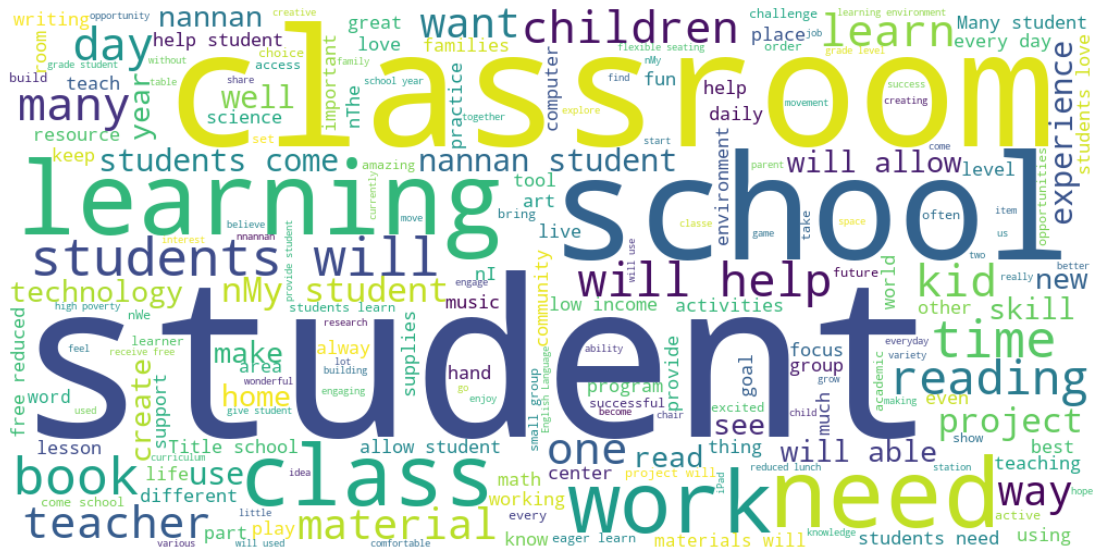

In [78]:
text = " ".join(review for review in fp_essay)
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(text)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### False Positive Price Box Plot

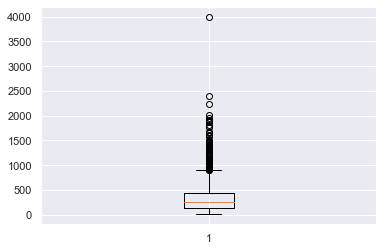

In [79]:
plt.boxplot(fp_price)
plt.show()

### False Positive Previous Projects PDF

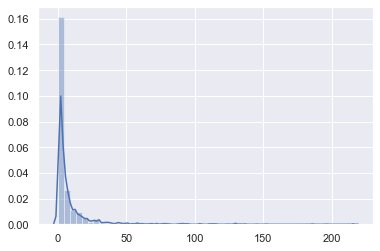

In [80]:
import seaborn as sns
sns.set()
sns.distplot(fp_prev_proj)

## 2.4.1 Applying Decision Tree on TFIDF-w2v,

In [87]:
from scipy.sparse import hstack
X_tr = hstack((X_train_school_state_categories_one_hot,X_train_sub_categories_one_hot,X_train_categories_one_hot,X_train_clean_teacher_prefix,X_train_grade,X_train_price,X_train_prev_project_norm,X_tr_tfidf_w2v_vectors,X_train_project_title_tfidf_w2v))

X_cr = hstack((X_cv_school_state_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_categories_one_hot,X_cv_clean_teacher_prefix,X_cv_grade,X_cv_price,X_cv_prev_project_norm,X_cv_tfidf_w2v_vectors,X_cv_project_title_tfidf_w2v))

X_te = hstack((X_test_school_state_categories_one_hot,X_test_sub_categories_one_hot,X_test_categories_one_hot,X_test_clean_teacher_prefix,X_test_grade,X_test_price,X_test_prev_project_norm,X_te_tfidf_w2v_vectors,X_test_project_title_tfidf_w2v))

print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_cr.shape, Y_cv.shape)
print(X_te.shape, Y_test.shape)

Final Data matrix
(34300, 701) (34300,)
(14700, 701) (14700,)
(21000, 701) (21000,)


## Simple Cross Validation:

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

depth = [1, 5, 10, 50, 100, 500, 1000]
train_auc = list()
cv_auc = list()
for d in depth:
    for sample in [5, 10, 100, 500]:
        dtc = DecisionTreeClassifier(max_depth = d, class_weight='balanced', min_samples_split = sample)
        dtc.fit(X_tr, Y_train)
        
        Y_probs_tr = dtc.predict(X_tr)
        Y_probs_cv = dtc.predict(X_cr)

        train_auc.append(roc_auc_score(Y_train, Y_probs_tr))
        cv_auc.append(roc_auc_score(Y_cv, Y_probs_cv))


In [89]:
train_auc = np.asarray(train_auc).reshape(7,4)
cv_auc = np.asarray(cv_auc).reshape(7,4)

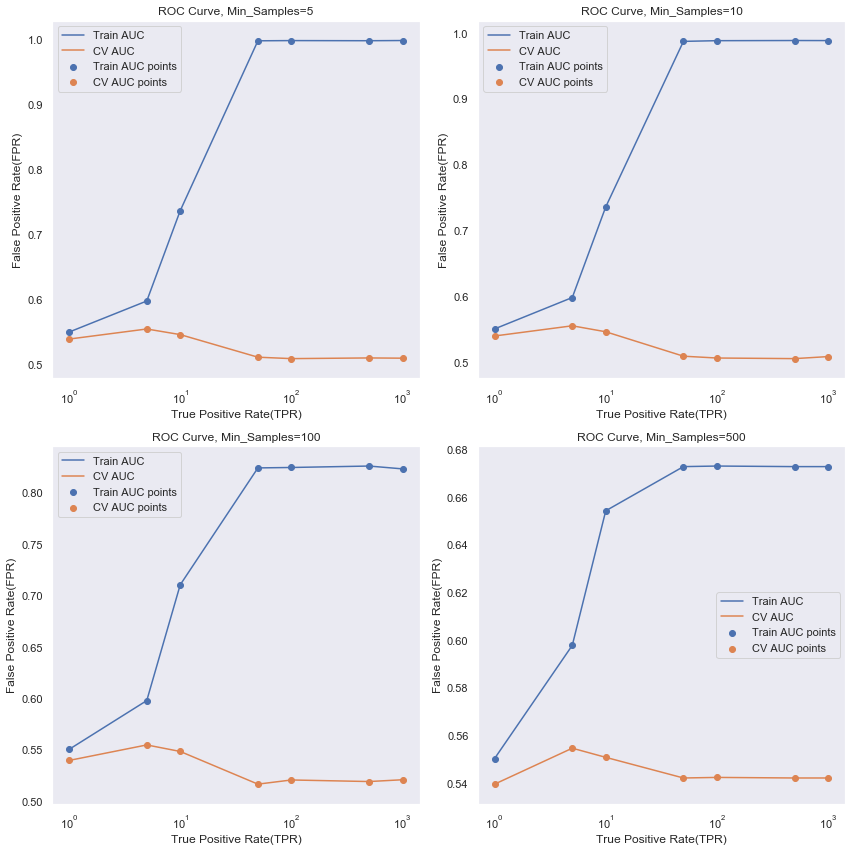

In [90]:
sample_list = [5, 10, 100, 500]
fig = plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(depth, train_auc[:,i], label='Train AUC')
    plt.plot(depth, cv_auc[:,i], label='CV AUC')
    plt.scatter(depth, train_auc[:,i], label='Train AUC points')
    plt.scatter(depth, cv_auc[:,i], label='CV AUC points')

    plt.xscale('log')
    plt.legend()
    plt.xlabel("True Positive Rate(TPR)")
    plt.ylabel("False Positive Rate(FPR)")
    plt.title("ROC Curve, Min_Samples=" + str(sample_list[i]))
    plt.grid()
fig.tight_layout()
plt.show()

## GRid Search CV

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}
clf = GridSearchCV(dtc, parameters, cv=3, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(X_tr, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


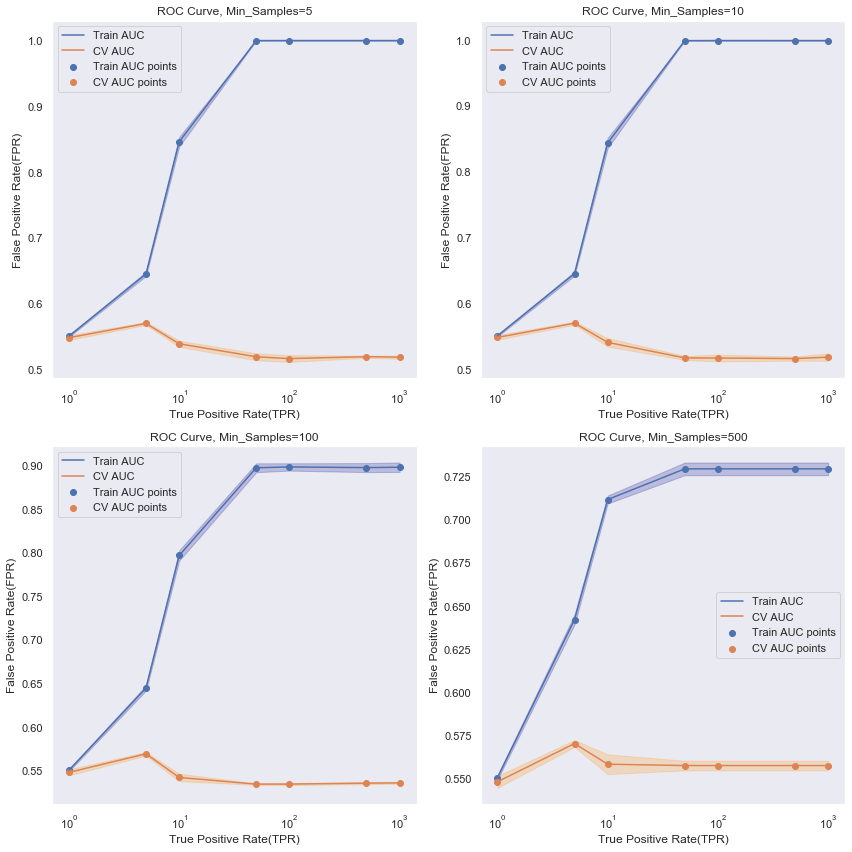

In [92]:
fig = plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(parameters['max_depth'], train_auc.reshape(7,4)[:,i], label='Train AUC')
    # https://stackoverflow.com/a/48803361/4084039
    plt.gca().fill_between(parameters['max_depth'],train_auc.reshape(7,4)[:,i] - train_auc_std.reshape(7,4)[:,i],train_auc.reshape(7,4)[:,i] + train_auc_std.reshape(7,4)[:,i],alpha=0.2,color='darkblue')

    plt.plot(parameters['max_depth'], cv_auc.reshape(7,4)[:,i], label='CV AUC')
    plt.gca().fill_between(parameters['max_depth'],cv_auc.reshape(7,4)[:,i] - cv_auc_std.reshape(7,4)[:,i],cv_auc.reshape(7,4)[:,i] + cv_auc_std.reshape(7,4)[:,i],alpha=0.2,color='darkorange')

    plt.scatter(parameters['max_depth'], train_auc.reshape(7,4)[:,i], label='Train AUC points')
    plt.scatter(parameters['max_depth'], cv_auc.reshape(7,4)[:,i], label='CV AUC points')

    plt.xscale('log')
    plt.legend()
    plt.xlabel("True Positive Rate(TPR)")
    plt.ylabel("False Positive Rate(FPR)")
    plt.title("ROC Curve, Min_Samples=" + str(sample_list[i]))
    plt.grid()
fig.tight_layout()
plt.show()

Train AUC: 0.639
Test AUC: 0.580


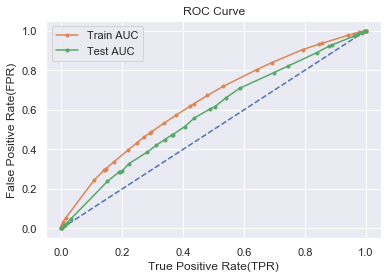

In [93]:
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

model_M = DecisionTreeClassifier(max_depth=5, min_samples_split=5, class_weight='balanced')
model_M.fit(X_tr, Y_train)
Y_probs_train = model_M.predict_proba(X_tr)
Y_probs_test = model_M.predict_proba(X_te)
Y_predicted = model_M.predict(X_te)
Y_predicted_tr = model_M.predict(X_tr)

# keep probabilities for the positive outcome only
Y_probs_train = Y_probs_train[:, 1]
Y_probs_test = Y_probs_test[:, 1]
# calculate AUC
train_auc = roc_auc_score(Y_train, Y_probs_train)
test_auc = roc_auc_score(Y_test, Y_probs_test)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, Y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, Y_probs_test)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
pyplot.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
pyplot.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC Curve")
# show the plot
pyplot.show()

the maximum value of tpr*(1-fpr) 0.36 for threshold 0.5
the maximum value of tpr*(1-fpr) 0.31 for threshold 0.51


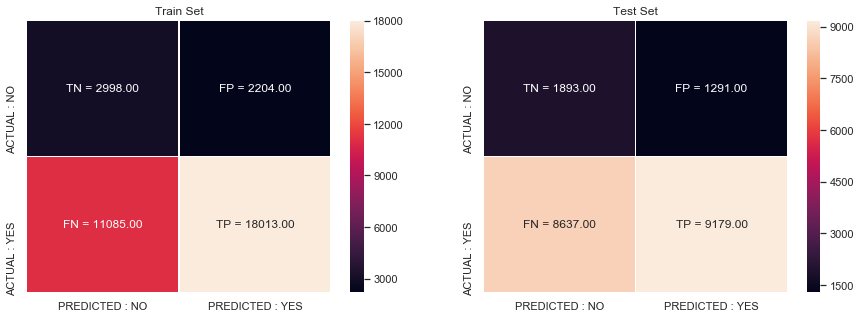

In [94]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()
con_m_train = confusion_matrix(Y_train, predict(Y_probs_train, train_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(Y_test, predict(Y_probs_test, test_thresholds, test_fpr, test_tpr))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [95]:
Y_te = list(Y_test)
Y_pr = list(Y_predicted)
print(len(Y_te), len(Y_pr))
fp_essay = list()
fp_price = list()
fp_prev_proj = list()
for i in range(len(Y_te)):
    if Y_te[i] == 0 and Y_pr[i] == 1:
        fp_essay.append(X_test.essay.values[i])
        fp_price.append(X_test.price.values[i])
        fp_prev_proj.append(X_test.teacher_number_of_previously_posted_projects.values[i])
print(len(fp_essay), len(fp_prev_proj), len(fp_price))

21000 21000
1389 1389 1389


### False Positive Essay WordCloud

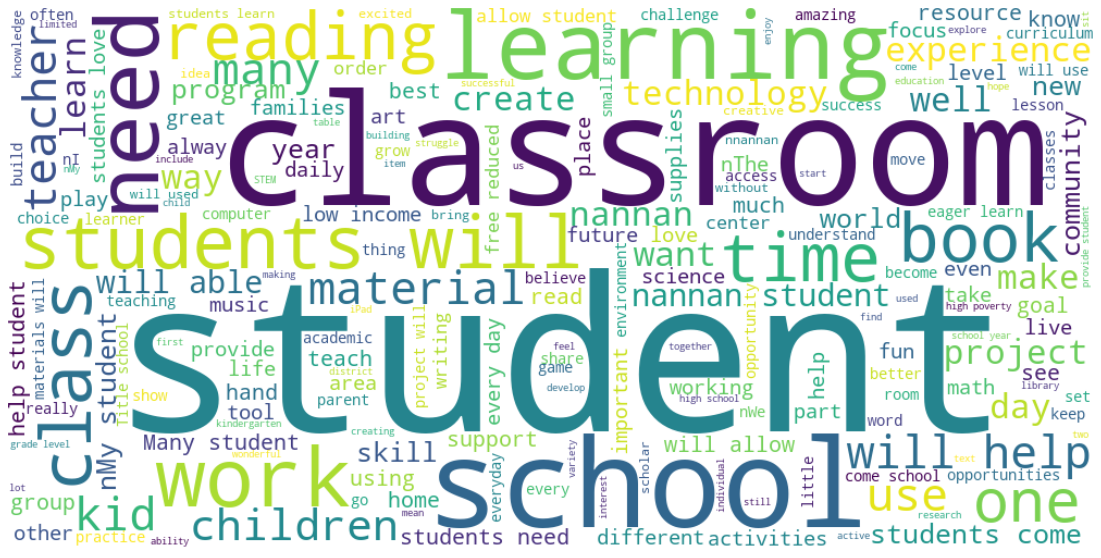

In [96]:
text = " ".join(review for review in fp_essay)
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(text)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### False Positive Price Box Plot

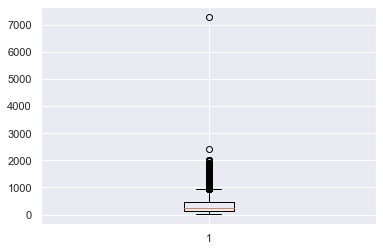

In [97]:
plt.boxplot(fp_price)
plt.show()

### False Positive Previous Projects PDF

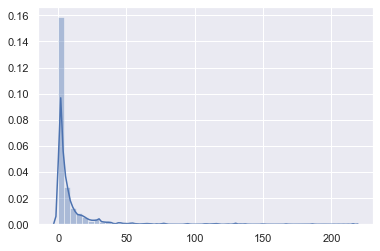

In [98]:
import seaborn as sns
sns.set()
sns.distplot(fp_prev_proj)

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [102]:
from scipy.sparse import hstack
X_tr = hstack((X_train_school_state_categories_one_hot,X_train_sub_categories_one_hot,X_train_categories_one_hot,X_train_clean_teacher_prefix,X_train_grade,
X_train_price,X_train_prev_project_norm,X_train_essay_tfidf,X_train_project_title_tfidf)).tocsr()

X_cr = hstack((X_cv_school_state_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_categories_one_hot,X_cv_clean_teacher_prefix,X_cv_grade,
X_cv_price,X_cv_prev_project_norm,X_cv_essay_tfidf,X_cv_project_title_tfidf)).tocsr()

X_te = hstack((X_test_school_state_categories_one_hot,X_test_sub_categories_one_hot,X_test_categories_one_hot,X_test_clean_teacher_prefix,X_test_grade,
X_test_price,X_test_prev_project_norm,X_test_essay_tfidf,X_test_project_title_tfidf)).tocsr()

print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_cr.shape, Y_cv.shape)
print(X_te.shape, Y_test.shape)

Final Data matrix
(34300, 12729) (34300,)
(14700, 12729) (14700,)
(21000, 12729) (21000,)


In [105]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_tr, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [106]:
feature_importance = dtc.feature_importances_
indexes = []
for i in range(feature_importance.shape[0]):
    s = feature_importance[i].sum()
    if s > 0 :
        indexes.append(i)
    else :
        pass

In [107]:
len(indexes)

1952

In [109]:
#here we have only 2865 important features, rest have feature_importance value zero
#we will consider only these 2865 for our model
X_tr_5 = X_tr[:, indexes]
X_cv_5 = X_cr[:, indexes]
X_te_5 = X_te[:, indexes]

### Simple Cross Validation:

In [110]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

alpha = [10**i for i in range(-4,5)]
train_auc = list()
cv_auc = list()
for al in alpha:
    sgd = SGDClassifier(alpha = al, class_weight='balanced')
    sgd.fit(X_tr_5, Y_train)
    Y_probs_tr = sgd.decision_function(X_tr_5)
    Y_probs_cv = sgd.decision_function(X_cv_5)
    train_auc.append(roc_auc_score(Y_train, Y_probs_tr))
    cv_auc.append(roc_auc_score(Y_cv, Y_probs_cv))


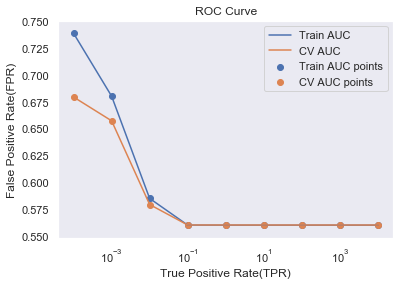

In [111]:
from matplotlib import pyplot as plt
plt.plot(alpha, train_auc, label='Train AUC')
plt.plot(alpha, cv_auc, label='CV AUC')
plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')
plt.xscale('log')
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC Curve")
plt.grid()
plt.show()

### GridSearchCV:

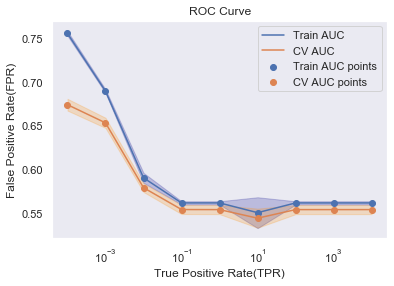

In [112]:
from sklearn.model_selection import GridSearchCV
sgd = SGDClassifier(class_weight='balanced')
parameters = {'alpha': [10**i for i in range(-4, 5)]}
clf = GridSearchCV(sgd, parameters, cv=3, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(X_tr_5, Y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc +
train_auc_std,alpha=0.2,color='darkblue')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color=
'darkorange')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.xscale('log')
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC Curve")
plt.grid()
plt.show()

### Training with best hyperparameter value, alpha = 0.001:

Train AUC: 0.682
Test AUC: 0.657


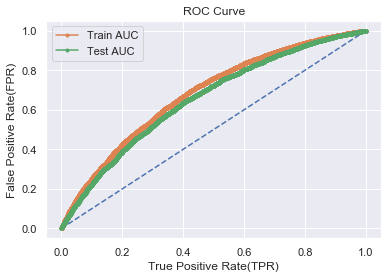

In [113]:
from matplotlib import pyplot
model_M = SGDClassifier(alpha=0.001, class_weight='balanced')
model_M.fit(X_tr_5, Y_train)
Y_probs_train = model_M.decision_function(X_tr_5)
Y_probs_test = model_M.decision_function(X_te_5)
Y_predicted = model_M.predict(X_te_5)
Y_predicted_tr = model_M.predict(X_tr_5)
# calculate AUC
train_auc = roc_auc_score(Y_train, Y_probs_train)

test_auc = roc_auc_score(Y_test, Y_probs_test)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, Y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, Y_probs_test)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
pyplot.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
pyplot.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC Curve")
# show the plot
pyplot.show()

###  Confusion Matrix:

the maximum value of tpr*(1-fpr) 0.4 for threshold -0.05
the maximum value of tpr*(1-fpr) 0.38 for threshold -0.03


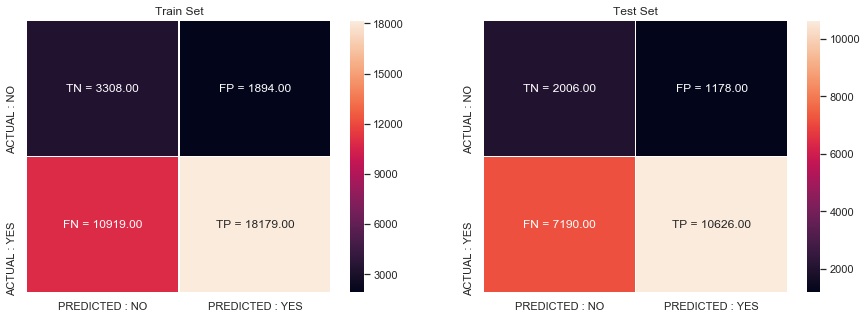

In [114]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()
con_m_train = confusion_matrix(Y_train, predict(Y_probs_train, train_thresholds, train_fpr, train_tpr))
con_m_test = confusion_matrix(Y_test, predict(Y_probs_test, test_thresholds, test_fpr, test_tpr))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

<h1>3. Conclusion</h1>

In [116]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Max_Depth", "Min_Split", "Train AUC","Test AUC"]
x.add_row(["BOW", 10, 500, 0.676,0.608])
x.add_row(["TFIDF", 10, 500, 0.682,0.615])
x.add_row(["AVG W2V", 5, 5, 0.640,0.583])
x.add_row(["TFIDF W2V", 5, 5, 0.639,0.580])
x.add_row(["SET 5", "NA","alpha = 0.001", 0.682, 0.657])
print(x)

+------------+-----------+---------------+-----------+----------+
| Vectorizer | Max_Depth |   Min_Split   | Train AUC | Test AUC |
+------------+-----------+---------------+-----------+----------+
|    BOW     |     10    |      500      |   0.676   |  0.608   |
|   TFIDF    |     10    |      500      |   0.682   |  0.615   |
|  AVG W2V   |     5     |       5       |    0.64   |  0.583   |
| TFIDF W2V  |     5     |       5       |   0.639   |   0.58   |
|   SET 5    |     NA    | alpha = 0.001 |   0.682   |  0.657   |
+------------+-----------+---------------+-----------+----------+
